In [9]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score

with h5py.File('train_catvnoncat.h5', 'r') as file:
    train_set_x = file['train_set_x'][:]
    train_set_y = file['train_set_y'][:]


with h5py.File('test_catvnoncat.h5', 'r') as file:
    test_set_x = file['test_set_x'][:]
    test_set_y = file['test_set_y'][:]



classes=np.unique(train_set_y)

m_train=train_set_x.shape[0]
m_test=test_set_x.shape[0]
num_px=train_set_x.shape[1]


print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 1)")
print ("train_set_x shape: " + str(train_set_x.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_X=train_set_x.reshape(-1,m_train)
test_set_X=test_set_x.reshape(-1,m_test)
y_train=train_set_y.reshape(1,m_train)
y_test=test_set_y.reshape(1,m_test)

train_set_X=train_set_X/255.0
test_set_X=test_set_X/255.0


Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 1)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (209,)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (50,)


In [16]:
def sigmoid(x):
    return 1/(1+np.exp(-x))



In [11]:
class LogisticRegression():
    def __init__(self,X,y,epochs,learning_rate=0.001):
        self.m=X.shape[1]
        dim=X.shape[0]
        self.X=X
        self.y=y
        self.w=np.zeros((dim,1))
        self.b=0
        self.epochs=epochs
        self.learning_rate=learning_rate

    def forward(self):
        Z=np.dot(self.w.T,self.X)+self.b
        A=sigmoid(Z)

        cost=-np.sum((self.y*np.log(A))+((1-self.y)*np.log(1-A)))/self.m
        return Z,A,cost

    def backward(self,A):
        dZ=A-self.y
        db=np.sum(dZ)/self.m
        dw=np.dot(self.X,dZ.T)/self.m
        return dw,db

    def main(self):
        cost_list=[]
        accuracy_list=[]
        for n in range(self.epochs):
            Z,A,cost=self.forward()
            dw,db=self.backward(A)
            cost_list.append(cost)
            y_pred = (A >= 0.5) * 1.0
            accuracy = accuracy_score(self.y.flatten(), y_pred.flatten())
            accuracy_list.append(accuracy)
            print(f'Epoch {n} - loss: {cost}, accuracy: {accuracy}')
            self.w -= self.learning_rate * dw
            self.b -= self.learning_rate * db

        plt.plot(cost_list)
        plt.show()
        plt.plot(accuracy_list)
        plt.show()

    def predict(self,test):
        A=sigmoid(np.dot(self.w.T,test)+self.b)
        y_pred = (A >= 0.5) * 1.0
        return y_pred

In [14]:
lr=LogisticRegression(train_set_X,y_train,1000)

Epoch 0 - loss: 0.6931471805599453, accuracy: 0.3444976076555024
Epoch 1 - loss: 0.6519954122868342, accuracy: 0.6555023923444976
Epoch 2 - loss: 0.6439610289644458, accuracy: 0.6555023923444976
Epoch 3 - loss: 0.6417371255760097, accuracy: 0.6555023923444976
Epoch 4 - loss: 0.6406559800030424, accuracy: 0.6555023923444976
Epoch 5 - loss: 0.6398270346087506, accuracy: 0.6555023923444976
Epoch 6 - loss: 0.6390667511218932, accuracy: 0.6555023923444976
Epoch 7 - loss: 0.638335469445389, accuracy: 0.6555023923444976
Epoch 8 - loss: 0.6376241047767787, accuracy: 0.6555023923444976
Epoch 9 - loss: 0.6369302163028785, accuracy: 0.6555023923444976
Epoch 10 - loss: 0.6362528319315233, accuracy: 0.6555023923444976
Epoch 11 - loss: 0.6355913167216194, accuracy: 0.6555023923444976
Epoch 12 - loss: 0.6349451241378792, accuracy: 0.6555023923444976
Epoch 13 - loss: 0.6343137410428931, accuracy: 0.6555023923444976
Epoch 14 - loss: 0.6336966752395943, accuracy: 0.6555023923444976
Epoch 15 - loss: 0.63

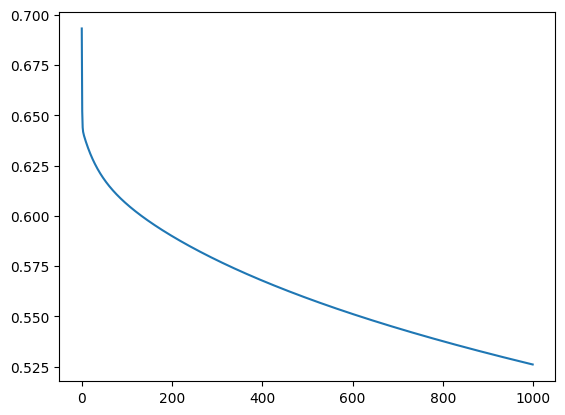

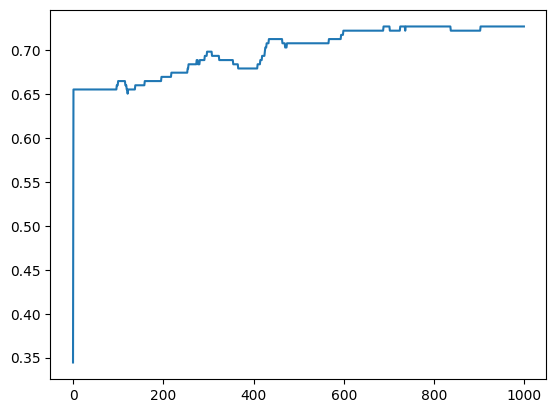

In [15]:
lr.main()